# **The main question about the project is:**




## **What is the main objective of the project?**




### ''To create models capable of predicting with maximum accuracy whether a patient is likely to have cancer or not."



To achieve this, I used some well-known libraries listed below, aiming to achieve the best accuracy in my models.

_____________________________________________________________

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

To perform the predictions and to handle the data, I used the main Python libraries: Scikit-learn, Pandas, Matplotlib, Numpy, Seaborn.

In [ ]:
plt.style.use('dark_background')
warnings.simplefilter('ignore', category=FutureWarning)



patients_data = pd.read_csv("/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv")
patients_data.head(10)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0



### **Dataset Structure**

**Features**


Age: Integer values representing the patient's age, ranging from 20 to 80.

Gender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.

BMI: Continuous values representing Body Mass Index, ranging from 15 to 40.

Smoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.

GeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

PhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

AlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

CancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

Diagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer

### **Data processing**

_____________________________________________________________

To achieve better precision I rounded some values ​​that had several decimal places to the nearest whole number

_____________________________________________________________

In [ ]:
patients_data[['AlcoholIntake','BMI','PhysicalActivity']] = patients_data[['AlcoholIntake','BMI','PhysicalActivity']].round(0)
patients_data.head(15)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.0,0,1,8.0,4.0,1,1
1,71,0,31.0,0,1,9.0,4.0,0,0
2,48,1,39.0,0,2,5.0,5.0,0,1
3,34,0,30.0,0,0,10.0,2.0,0,0
4,62,1,35.0,0,0,5.0,3.0,0,1
5,27,0,37.0,0,1,4.0,2.0,0,0
6,80,1,21.0,0,0,8.0,3.0,0,0
7,40,0,20.0,1,0,5.0,2.0,1,0
8,58,1,30.0,0,1,5.0,1.0,1,1
9,77,0,25.0,0,1,5.0,3.0,0,0


_____________________________________________________________

Below I created some columns with average values ​​from the BMI, AGE, Physical Activity and Alcohol Intake columns

This improves the accuracy of learning methods

_____________________________________________________________

In [ ]:

patients_data['Age main'] = np.where(patients_data['Age'] < 50, '<50', '>=50')
patients_data['BMI main'] = np.where(patients_data['BMI'] < 27, '<27', '>=27')
patients_data['PhysicalActivity main'] = np.where(patients_data['PhysicalActivity'] < 5, '<5', '>=5')
patients_data['AlcoholIntake main'] = np.where(patients_data['AlcoholIntake'] < 2, '<2', '>=2')

patients_data.head(15)


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,Age main,BMI main,PhysicalActivity main,AlcoholIntake main
0,58,1,16.0,0,1,8.0,4.0,1,1,>=50,<27,>=5,>=2
1,71,0,31.0,0,1,9.0,4.0,0,0,>=50,>=27,>=5,>=2
2,48,1,39.0,0,2,5.0,5.0,0,1,<50,>=27,>=5,>=2
3,34,0,30.0,0,0,10.0,2.0,0,0,<50,>=27,>=5,>=2
4,62,1,35.0,0,0,5.0,3.0,0,1,>=50,>=27,>=5,>=2
5,27,0,37.0,0,1,4.0,2.0,0,0,<50,>=27,<5,>=2
6,80,1,21.0,0,0,8.0,3.0,0,0,>=50,<27,>=5,>=2
7,40,0,20.0,1,0,5.0,2.0,1,0,<50,<27,>=5,>=2
8,58,1,30.0,0,1,5.0,1.0,1,1,>=50,>=27,>=5,<2
9,77,0,25.0,0,1,5.0,3.0,0,0,>=50,<27,>=5,>=2


In [ ]:
patients_data.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis', 'Age main', 'BMI main',
       'PhysicalActivity main', 'AlcoholIntake main'],
      dtype='object')

In [ ]:
new_order = ['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Age main', 'BMI main',
       'PhysicalActivity main', 'AlcoholIntake main', 'Diagnosis']

patients_data = patients_data[new_order]
patients_data.head(15)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Age main,BMI main,PhysicalActivity main,AlcoholIntake main,Diagnosis
0,58,1,16.0,0,1,8.0,4.0,1,>=50,<27,>=5,>=2,1
1,71,0,31.0,0,1,9.0,4.0,0,>=50,>=27,>=5,>=2,0
2,48,1,39.0,0,2,5.0,5.0,0,<50,>=27,>=5,>=2,1
3,34,0,30.0,0,0,10.0,2.0,0,<50,>=27,>=5,>=2,0
4,62,1,35.0,0,0,5.0,3.0,0,>=50,>=27,>=5,>=2,1
5,27,0,37.0,0,1,4.0,2.0,0,<50,>=27,<5,>=2,0
6,80,1,21.0,0,0,8.0,3.0,0,>=50,<27,>=5,>=2,0
7,40,0,20.0,1,0,5.0,2.0,1,<50,<27,>=5,>=2,0
8,58,1,30.0,0,1,5.0,1.0,1,>=50,>=27,>=5,<2,1
9,77,0,25.0,0,1,5.0,3.0,0,>=50,<27,>=5,>=2,0


_____________________________________________________________

An important piece of information that can impact the final result is null attributes and, in this case, there were none.

_____________________________________________________________

In [ ]:
missing_values_per_column = patients_data.isna().sum()
print(missing_values_per_column)

Age                      0
Gender                   0
BMI                      0
Smoking                  0
GeneticRisk              0
PhysicalActivity         0
AlcoholIntake            0
CancerHistory            0
Age main                 0
BMI main                 0
PhysicalActivity main    0
AlcoholIntake main       0
Diagnosis                0
dtype: int64


In [ ]:
patients_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.0,35.0,51.0,66.0,80.0
Gender,1500.0,0.490667,0.500080,0.0,0.0,0.0,1.0,1.0
BMI,1500.0,27.526000,7.248012,15.0,21.0,28.0,34.0,40.0
Smoking,1500.0,0.269333,0.443761,0.0,0.0,0.0,1.0,1.0
GeneticRisk,1500.0,0.508667,0.678895,0.0,0.0,0.0,1.0,2.0
PhysicalActivity,1500.0,4.902000,2.872960,0.0,2.0,5.0,7.0,10.0
AlcoholIntake,1500.0,2.414667,1.469294,0.0,1.0,2.0,4.0,5.0
CancerHistory,1500.0,0.144000,0.351207,0.0,0.0,0.0,0.0,1.0
Diagnosis,1500.0,0.371333,0.483322,0.0,0.0,0.0,1.0,1.0


_____________________________________________________________

### **Generating graphs for analysis**

In [ ]:
patients_data.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Age main', 'BMI main',
       'PhysicalActivity main', 'AlcoholIntake main', 'Diagnosis'],
      dtype='object')

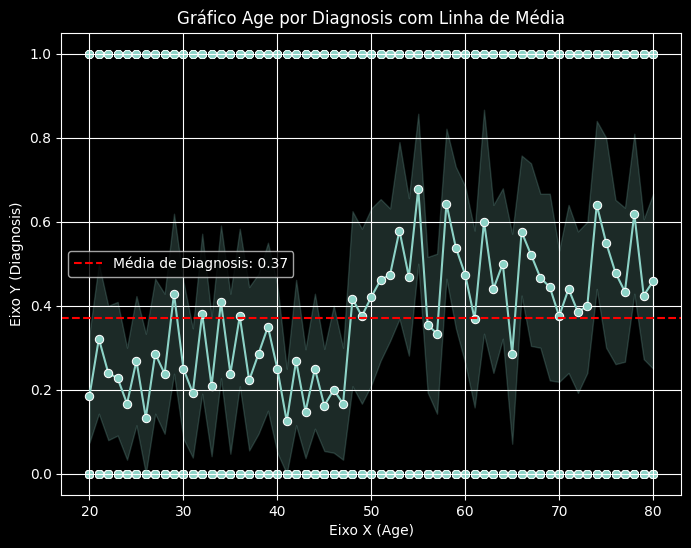

In [ ]:


mean_age = patients_data['Age'].mean()

mean_diagnosis = patients_data['Diagnosis'].mean()


plt.figure(figsize=(8, 6))



sns.scatterplot(x='Age', y='Diagnosis', data=patients_data)

sns.lineplot(x='Age', y='Diagnosis', data=patients_data, marker='o')



plt.axhline(mean_diagnosis, color='red', linestyle='--', label=f'Média de Diagnosis: {mean_diagnosis:.2f}')

plt.xlabel('Eixo X (Age)')
plt.ylabel('Eixo Y (Diagnosis)')
plt.title('Gráfico Age por Diagnosis com Linha de Média')
plt.grid(True)
plt.legend()


plt.show()

_____________________________________________________________

Through the graph above, we can see that the patient's age is an extremely important factor that directly affects the analysis,
It is possible to see that the probability of people over 50 years of age having cancer is greater than that of people under 50 years of age.

Below I drew a parallel using the 'Sankey chart' among other variables that are commonly used to predict whether or not a patient is likely to have cancer, which are:

alcohol consumption and smokers

_____________________________________________________________

In [ ]:
grafico = px.parallel_categories(
    patients_data,
    dimensions=[ 'Age main','Smoking', 'AlcoholIntake' ],
    color='Diagnosis'
)
grafico.show()

_____________________________________________________________

I repeated the process again, but using other variables, also using age as a base

_____________________________________________________________

In [ ]:
grafico = px.parallel_categories(
    patients_data,
    dimensions=[ 'Age main','CancerHistory', 'GeneticRisk' ],
    color='Diagnosis'
)

grafico.show()

### **Predictions and Classes**

In [ ]:
patients_data.shape

(1500, 13)

In [ ]:
x_diagnostic = patients_data.iloc[ : , 0:12].values
y_diagnostic = patients_data.iloc[ : ,12].values
x_diagnostic

array([[58, 1, 16.0, ..., '<27', '>=5', '>=2'],
       [71, 0, 31.0, ..., '>=27', '>=5', '>=2'],
       [48, 1, 39.0, ..., '>=27', '>=5', '>=2'],
       ...,
       [63, 1, 33.0, ..., '>=27', '<5', '<2'],
       [55, 0, 26.0, ..., '<27', '>=5', '>=2'],
       [67, 1, 24.0, ..., '<27', '<5', '>=2']], dtype=object)

In [ ]:
y_diagnostic

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
x_diagnostic.shape

(1500, 12)

In [ ]:
label_patients = LabelEncoder()
x_diagnostic[:,8] = label_patients.fit_transform(x_diagnostic[:,8])
x_diagnostic[:,9] = label_patients.fit_transform(x_diagnostic[:,9])
x_diagnostic[:,10] = label_patients.fit_transform(x_diagnostic[:,10])
x_diagnostic[:,11] = label_patients.fit_transform(x_diagnostic[:,11])


x_diagnostic

array([[58, 1, 16.0, ..., 0, 1, 1],
       [71, 0, 31.0, ..., 1, 1, 1],
       [48, 1, 39.0, ..., 1, 1, 1],
       ...,
       [63, 1, 33.0, ..., 1, 0, 0],
       [55, 0, 26.0, ..., 0, 1, 1],
       [67, 1, 24.0, ..., 0, 0, 1]], dtype=object)

In [ ]:
OneHotEncoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6,7,8,9,10,11])], remainder='passthrough')
x_diagnostic = OneHotEncoder.fit_transform(x_diagnostic).toarray()
x_diagnostic


array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
x_diagnostic.shape

(1500, 121)

In [ ]:
scaler = StandardScaler()
x_diagnostic = scaler.fit_transform(x_diagnostic)
x_diagnostic

array([[-0.1353881 , -0.13791932, -0.13018891, ...,  0.93416229,
        -0.67028006,  0.67028006],
       [-0.1353881 , -0.13791932, -0.13018891, ...,  0.93416229,
        -0.67028006,  0.67028006],
       [-0.1353881 , -0.13791932, -0.13018891, ...,  0.93416229,
        -0.67028006,  0.67028006],
       ...,
       [-0.1353881 , -0.13791932, -0.13018891, ..., -1.07047781,
         1.49191369, -1.49191369],
       [-0.1353881 , -0.13791932, -0.13018891, ...,  0.93416229,
        -0.67028006,  0.67028006],
       [-0.1353881 , -0.13791932, -0.13018891, ..., -1.07047781,
        -0.67028006,  0.67028006]])

### **training dataset X test dataset**

In [ ]:
diagnostic_X_train, diagnostic_X_test, diagnostic_y_train, diagnostic_y_test = train_test_split(x_diagnostic, y_diagnostic, test_size = 0.25, random_state = 0)

_____________________________________________________________________________________________________________________________________________________

## **Testing the model**

_____________________________________________________________________________________________________________________________________________________

### **Decision tree - 85,86%**

In [ ]:
tree_diagnostic = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree_diagnostic.fit(diagnostic_X_train, diagnostic_y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predict_diagnostic = tree_diagnostic.predict(diagnostic_X_test)

In [ ]:
accuracy_diagnostic = accuracy_score(diagnostic_y_test, predict_diagnostic)
accuracy_diagnostic

0.8586666666666667

In [ ]:
treecm_diagnostic = confusion_matrix(diagnostic_y_test,predict_diagnostic)
treecm_diagnostic

array([[208,  28],
       [ 25, 114]])

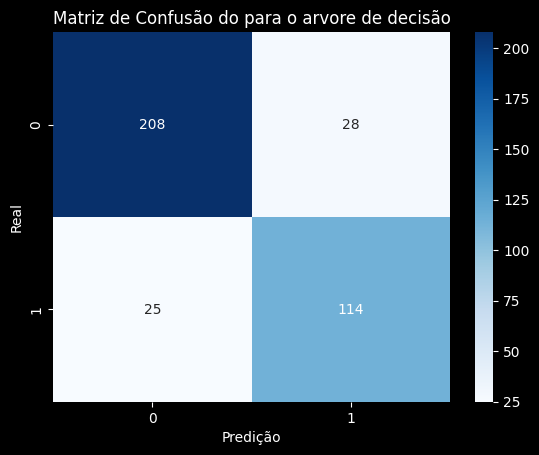

In [ ]:

cm = confusion_matrix(diagnostic_y_test, predict_diagnostic)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão do para o arvore de decisão')
plt.show()


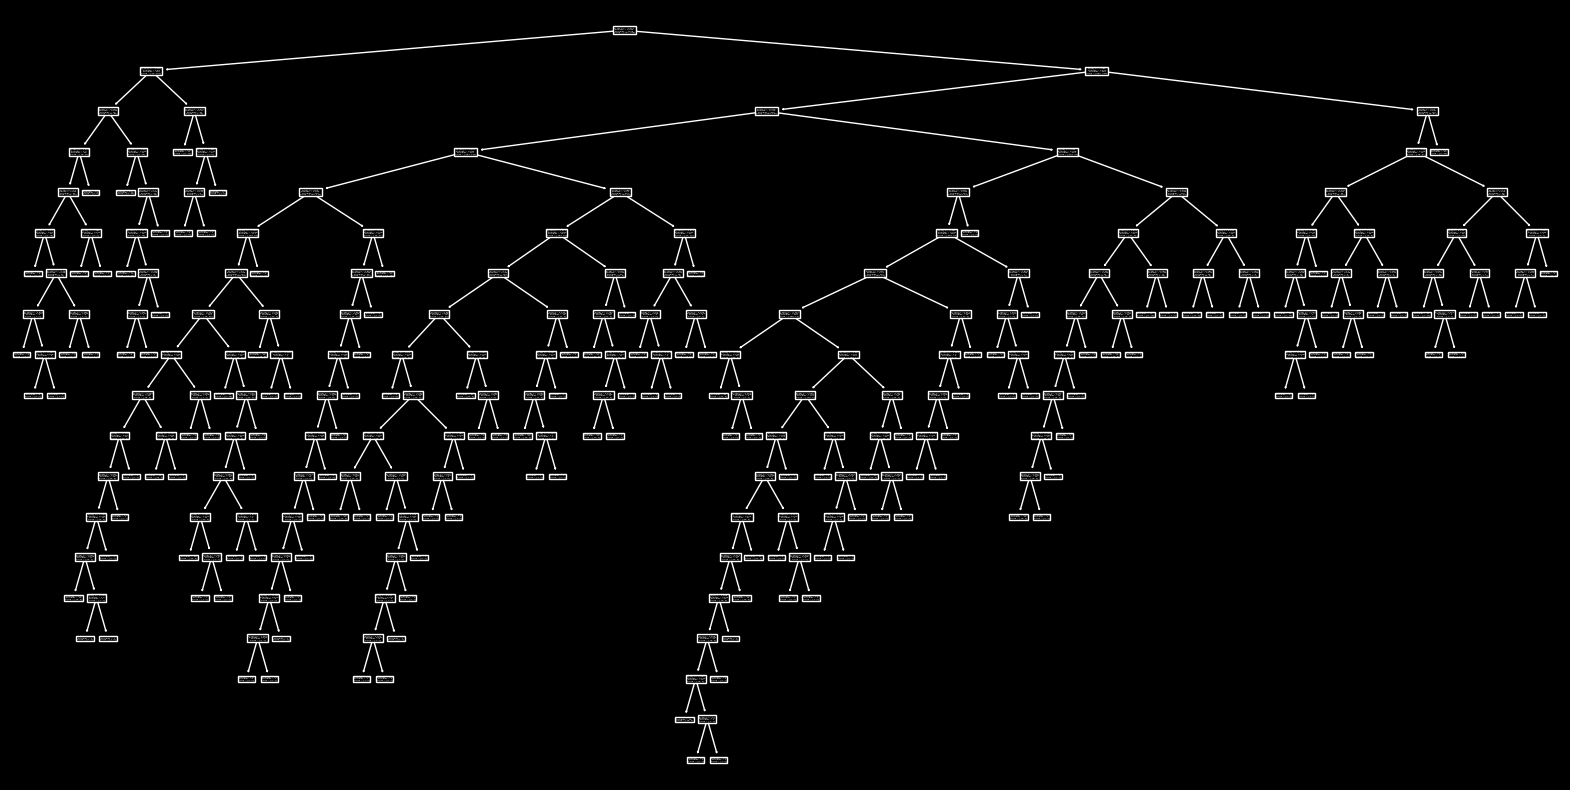

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree_diagnostic)
plt.show()

### **Random Forest - 89,33% **

In [ ]:
random_forest_diagnostic = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 0)
random_forest_diagnostic.fit(diagnostic_X_train, diagnostic_y_train)

RandomForestClassifier(criterion='entropy', n_estimators=60, random_state=0)

In [ ]:
forest_predict_diagnostic = random_forest_diagnostic.predict(diagnostic_X_test)

In [ ]:
diagnostic_accuracy = accuracy_score(diagnostic_y_test, forest_predict_diagnostic)
diagnostic_accuracy

0.8933333333333333

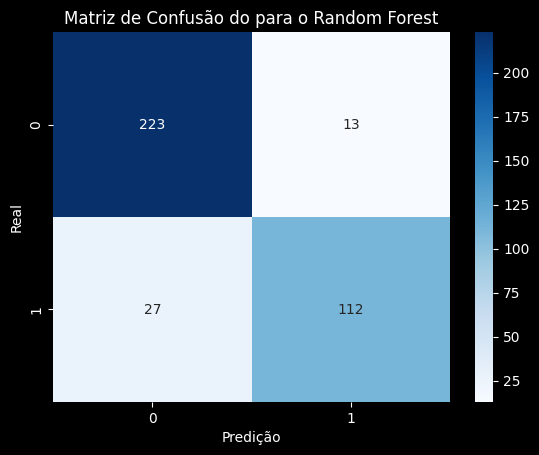

In [ ]:

cm_random = confusion_matrix(diagnostic_y_test, forest_predict_diagnostic)

sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão do para o Random Forest')
plt.show()

### **Logistic regression -  94,93%**

In [ ]:
logistic_diagnostic = LogisticRegression(random_state = 1)
logistic_diagnostic.fit(diagnostic_X_train, diagnostic_y_train)

LogisticRegression(random_state=1)

In [ ]:
logistic_diagnostic.intercept_

array([-1.3642199])

In [ ]:
logistic_diagnostic.coef_

array([[-0.11417277,  0.08747374, -0.01603048, -0.04702659, -0.10319249,
         0.03763585,  0.10550347,  0.06068512, -0.05965521,  0.36145069,
        -0.18079923, -0.06244626,  0.0387743 , -0.23618899,  0.0982667 ,
        -0.13218168,  0.02779478, -0.08073951, -0.13308941, -0.01302356,
        -0.14125187, -0.0597484 , -0.16667335, -0.22383823, -0.18458426,
        -0.24639007, -0.24895252, -0.10661187,  0.09787906, -0.11585899,
        -0.07832562,  0.01464858, -0.01882344, -0.00614984,  0.14851225,
         0.2769561 ,  0.07213819,  0.01298803,  0.15030274,  0.00576055,
         0.03194079, -0.02207145,  0.20930689,  0.03780655,  0.04858574,
        -0.0282778 ,  0.00931243,  0.01545758,  0.072929  ,  0.07163533,
         0.08795796,  0.0584805 , -0.03811002,  0.03485556,  0.21301297,
         0.17673947,  0.06284508, -0.00509036,  0.12742727,  0.07768639,
        -0.00966357, -0.80805621,  0.80805621, -0.30699519, -0.24173485,
        -0.22434624, -0.02319104, -0.20140236, -0.1

In [ ]:
previsoes_diagnostic = logistic_diagnostic.predict(diagnostic_X_test)
accuracy_diagnostic = accuracy_score(diagnostic_y_test, previsoes_diagnostic)
accuracy_diagnostic

0.9493333333333334

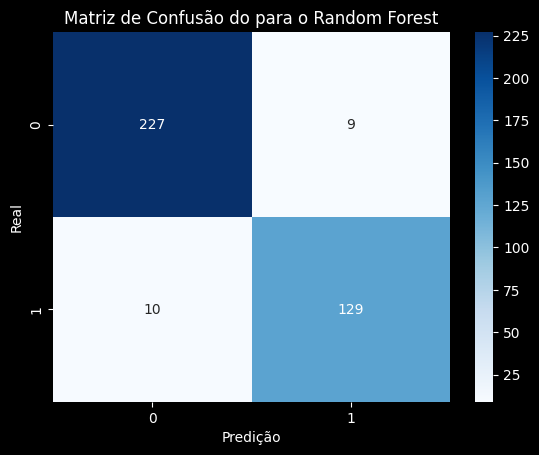

In [ ]:

cm_logistic = confusion_matrix (diagnostic_y_test, previsoes_diagnostic)

sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão do para o Random Forest')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(diagnostic_y_test, previsoes_diagnostic))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       236
           1       0.93      0.93      0.93       139

    accuracy                           0.95       375
   macro avg       0.95      0.94      0.95       375
weighted avg       0.95      0.95      0.95       375



### **SVM - 93,33%**

In [ ]:
svm_diagnostic = SVC(kernel = 'sigmoid', random_state = 0, C=1.0, gamma=0.01) #kernel : linear,poly,rbf,sigmoid
svm_diagnostic.fit(diagnostic_X_train, diagnostic_y_train) #

SVC(gamma=0.01, kernel='sigmoid', random_state=0)

In [ ]:
previsoes_diagnostic= svm_diagnostic.predict(diagnostic_X_test)


In [ ]:
accuracy_diagnostic = accuracy_score(diagnostic_y_test, previsoes_diagnostic)
accuracy_diagnostic

0.9333333333333333

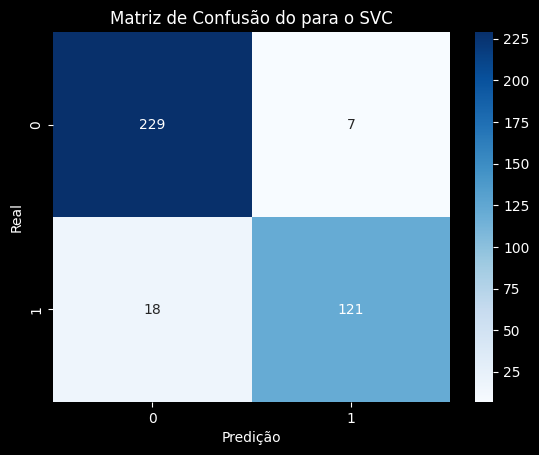

In [ ]:

cm_svc = confusion_matrix(diagnostic_y_test, previsoes_diagnostic)

sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão do para o SVC')
plt.show()

In [ ]:
# Define models for evaluation
models = {
    'Logistic Regression(%)': [94.93],
    'Decision Tree(%)': [85.86],
    'Random Forest %)': [89.33],
    'SVM(%)': [93.33]

}

results_df = pd.DataFrame(models)

results_df

,Logistic Regression(%),Decision Tree(%),Random Forest %),SVM(%)
0,94.93,85.86,89.33,93.33
